<br/>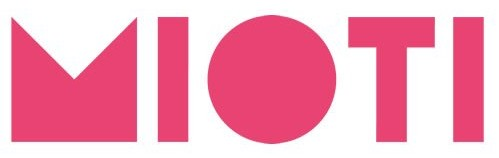<br/><br/>
<center style="color:#888">Machine learning 3</center>
<center style="color:#aaa; margin-top:10px;"><b>Prof. Diego García Morate</b><br>diegogm@faculty.mioti.es</center>
<p style="font-size: 2.5em; text-align:center">Challenge S2: Previsión COVID-19</p><br/>

# Objetivos

El objetivo de este challenge es proporcionar una estimación realista del estado del COVID en España y si es posible estimar su impacto y predecirlo.

## Prerrequisitos

Para hacer funcionar este worksheet deberás tener instalados los paquetes:

* `numpy`
* `pandas`
* `scikit-learn`
* `scipy`
* `deap`

## Configuración del entorno

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, exp, pi
import sklearn

import random

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from ipywidgets import interactive, IntSlider, FloatSlider

# Dataset

Para analizar este problema vamos a descargarnos un dataset que pone a disposición la unión europea en la siguiente url:

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [2]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2020-04-19.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dateRep                  11768 non-null  datetime64[ns]
 1   day                      11768 non-null  int64         
 2   month                    11768 non-null  int64         
 3   year                     11768 non-null  int64         
 4   cases                    11768 non-null  int64         
 5   deaths                   11768 non-null  int64         
 6   countriesAndTerritories  11768 non-null  object        
 7   geoId                    11732 non-null  object        
 8   countryterritoryCode     11646 non-null  object        
 9   popData2018              11681 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 919.5+ KB


Filtramos el dataset para quedarnos sólo con España:

In [4]:
df_spain = df[df['geoId'] == 'ES']

In [5]:
df_spain = df_spain[df_spain['dateRep'] >= '2020-02-20']

In [6]:
df_spain[df_spain['cases'] > 100].min()

dateRep                    2020-03-07 00:00:00
day                                          1
month                                        3
year                                      2020
cases                                      113
deaths                                       0
countriesAndTerritories                  Spain
geoId                                       ES
countryterritoryCode                       ESP
popData2018                         46723749.0
dtype: object

In [7]:
df_spain = df_spain.set_index('dateRep').sort_index()

<AxesSubplot:xlabel='dateRep'>

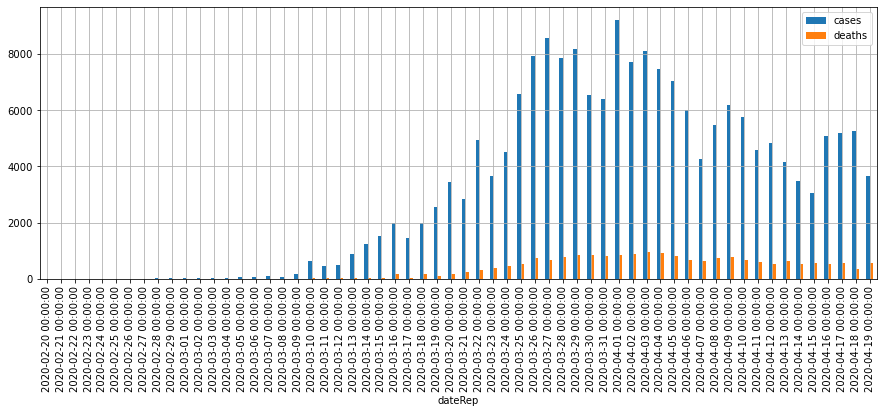

In [8]:
df_spain[['cases', 'deaths']].plot.bar(figsize=(15,5), grid=True)

In [9]:
df_spain

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
dateRep,,,,,,,,,
2020-02-20,20,2,2020,0,0,Spain,ES,ESP,46723749.0
2020-02-21,21,2,2020,0,0,Spain,ES,ESP,46723749.0
2020-02-22,22,2,2020,0,0,Spain,ES,ESP,46723749.0
2020-02-23,23,2,2020,0,0,Spain,ES,ESP,46723749.0
2020-02-24,24,2,2020,0,0,Spain,ES,ESP,46723749.0
2020-02-25,25,2,2020,1,0,Spain,ES,ESP,46723749.0
2020-02-26,26,2,2020,4,0,Spain,ES,ESP,46723749.0
2020-02-27,27,2,2020,5,0,Spain,ES,ESP,46723749.0
2020-02-28,28,2,2020,13,0,Spain,ES,ESP,46723749.0


En este caso nos vamos a quedar como variables a trabajar el número de días desde el inicio de la pandemia, que llamaremos variable $x$ y la variable $y$ que será el número de casos.

In [10]:
puntos_x = list((df_spain.index - df_spain.index.min()).days)

In [11]:
puntos_x[0:20]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [12]:
puntos_y = list(df_spain.cases)

In [13]:
puntos_y[0:20]

[0, 0, 0, 0, 0, 1, 4, 5, 13, 9, 32, 17, 31, 37, 49, 61, 113, 56, 159, 615]

Un punto que es interesante antes de empezar a modelar los datos es normalizarlos. Para ello normalizaremos la variable objetivo (y) respecto al número máximo

In [14]:
puntos_y = [punto/max(puntos_y) for punto in puntos_y]

# Problema a resolver

El problema que vamos a resolver es intentar modelizar estos datos mediante un algoritmo genético. Una vez que tengamos el modelo podemos utilizarlo para poder analizar el futuro.

Para ello vamos a empezar respondiendo las siguientes preguntas, empezando para la **curva de infectados**:

## ¿Para este problema que podría ser cada uno de los individuos?

Cada uno de los individuos podría ser cada una de los posibles modelos a generar. En este caso vamos a utilizar una función gaussiana:

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^\frac{-(x-\mu)²}{2*\sigma²} $$

Por ello cada individuo deberá modelizarse con 2 parámetros: $\mu$, $\sigma$. Donde $\mu$ es el valor donde del centro de la curva y $\sigma$ controla la curtosis de la curva (lo estrecha o gruesa que es).

Puedes ver como se comportan los mismos en la siguiente página web: https://academo.org/demos/gaussian-distribution/

In [15]:
# multiplier es un 3 parametro para incluir uyn tercer grado de libertad. Con esto facilitamos la convergencia.
def gauss(x, mu, sigma, multiplier):
    primer = 1 / (sigma * sqrt(2*pi))
    segundo = -((x - mu)*(x - mu)) / (2*sigma*sigma)    
    return multiplier * primer * exp(segundo)

In [16]:
def draw_gaussian(mu, sigma, multiplier):
    
    x_values = []
    y_values = []
    
    for x in range(0, 100):
        y_values.append(gauss(x, mu, sigma, multiplier))
    
    plt.figure(figsize=(18, 12))
    plt.plot(y_values, alpha=0.75, lw=4)
    plt.grid(True)
    axes = plt.gca()
    axes.set_ylim([0,1])
    plt.show()
    
slider_mu = FloatSlider(min=0, max=50, step=1, value=1, continuous_update=False)
slider_sigma = FloatSlider(min=1, max=60, step=1, value=30, continuous_update=False)
slider_multiplier = FloatSlider(min=1, max=60, step=1, value=30, continuous_update=False)

interactive(draw_gaussian, mu=slider_mu, sigma=slider_sigma, multiplier=slider_multiplier)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='mu', max=50.0, step=1.0), F…

El error producido al comparar las predicciones del modelo versus los datos reales.

## ¿Y la función de recombinación?

Una función que tome dos modelos y combine ambos parámetros, por ejemplo haciendo la media de los mismos para producir un nuevo modelo.

# Implementación del modelo

Para implementar el modelo puedes utilizar DEAP o bien la implementación custom. Yo te recomiendo la implementación custom si quieres centrarse más en aprender los algoritmos genéticos y cuando la tengas ya pases (si tienes tiempo y ganas) a DEAP que es algo más mantenible en un entorno de producción:

In [17]:
# Implementa aquí tu modelo. Deberás implementar las siguientes funciones y clases. 
# Algunas de ellas te valdrán directamente las que vienen en el worksheet y otras tendrás que adaptarlas.

#class Individuo(object):

class Individuo(object):
    def __init__(self, sigma, mu, multiplicador):
        self.sigma = sigma
        self.mu = mu
        self.multiplicador = multiplicador
        
        self.ajuste = None
        
    def gauss(self,x):
        
        primer = 1 / (self.sigma * sqrt(2*pi))
        segundo = -((x - self.mu)*(x - self.mu)) / (2*self.sigma*self.sigma) 
        
        return self.multiplicador * primer * exp(segundo)
    
    def calcular_ajuste(self, puntos_x, puntos_y):
        error_acc = 0.0
        for i in range(len(puntos_x)):
#             print(f'puntos{i} : {puntos_x[i]}')
            
            dest_y = self.gauss(puntos_x[i])

            error = dest_y - puntos_y[i]
            error = error * error

            error_acc += error
#             print(error_acc)

        self.ajuste = error_acc/len(puntos_x) # El ajuste esta basado en el cáclculo del ECM/MSE
#        / print(self.ajuste)

    def __repr__(self):
        
        return f"Individuo(sigma={self.sigma} mu={self.mu}, multi={self.multiplicador}, ajuste={self.ajuste})"




In [18]:
#def inicializar_pool(size=20):
def inicializar_pool(size=20,valor_mu=20,valor_sigma=5,valor_multiplicador=3):
    pool = []
    for i in range(size):
        mu = random.uniform(-valor_mu, valor_mu)
        sigma = random.uniform(-valor_sigma,valor_sigma)
        multiplicador = random.uniform(-valor_multiplicador,valor_multiplicador)
        
        pool.append(Individuo(sigma,mu,multiplicador))
    
    return pool

#def calcular_ajuste(pool, puntos_x, puntos_y):

def calcular_ajuste(pool, puntos_x, puntos_y):
    for individuo in pool:        
        individuo.calcular_ajuste(puntos_x, puntos_y)            
    return pool

#def mejor_individuo(pool, puntos_x, puntos_y):

def mejor_individuo(pool, puntos_x, puntos_y):
    """
    Devuelve el mejor individuo y el mejor ajuste
    """
    return sorted(pool, key=lambda obj: obj.ajuste)[0]


#def elegir_mejores_individuos(pool, num_individuos=10):

def elegir_mejores_individuos(pool, num_individuos=10):
    return sorted(pool, key=lambda obj: obj.ajuste)[:num_individuos]

#def cross_over(x, y):

def cross_over(individuo_x, individuo_y):
    
    sigma_combinado = 0.5 * (individuo_x.sigma + individuo_y.sigma)
    mu_combinado = 0.5 * (individuo_x.mu + individuo_y.mu)
    multiplicador_combinado= 0.5 * (individuo_x.multiplicador + individuo_y.multiplicador)
    
    return Individuo(sigma_combinado, mu_combinado, multiplicador_combinado)


#def cross_over_pool(pool, pool_size_dest=10):

def cross_over_pool(pool, pool_size_dest=10):
    size_pool = len(pool)
    new_pool = []
    
    for i in range(pool_size_dest):
        a = random.randint(0, size_pool - 1)
        b = random.randint(0, size_pool - 1)
        
        new_pool.append(cross_over(pool[a], pool[b]))
        
    return new_pool

#def mutar(individuo, coef_mutacion=0.5):

def mutar(individuo, coef_mutacion=0.5):
       
    individuo.sigma = individuo.sigma + random.uniform(-coef_mutacion, coef_mutacion)
    individuo.mu = individuo.mu + random.uniform(-coef_mutacion, coef_mutacion)
    individuo.multiplicador = individuo.multiplicador + random.uniform(-coef_mutacion, coef_mutacion)
    individuo.ajuste = None
    
    return individuo

#def mutar_pool(pool, coef_mutacion=0.5):

def mutar_pool(pool, coef_mutacion=0.5):
    new_pool = []
    
    for individuo in pool:
        new_pool.append(mutar(individuo, coef_mutacion))
        
    return new_pool


In [19]:
resul_list=[]

# Vamos a tomar los valores de mu de una serie de fibonacci y así ver como influye en el calculo del ajuste.

for valor_mu in [2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377,610, 987, 1597]:
    
    pool = inicializar_pool(100,valor_mu)
    pool = calcular_ajuste(pool, puntos_x, puntos_y)
    max_iteraciones = 30 # Similar a las epocas de las NN.
    iteraciones = 0


    while mejor_individuo(pool, puntos_x, puntos_y).ajuste > 0.1:
        pool = elegir_mejores_individuos(pool, 3)
        pool = cross_over_pool(pool, 10)
        pool = mutar_pool(pool)
        pool = calcular_ajuste(pool, puntos_x, puntos_y)

        iteraciones += 1

#         print(f"[{iteraciones}] {mejor_individuo(pool, puntos_x, puntos_y)}")


        if iteraciones == max_iteraciones:
            break

    mejor_ind=mejor_individuo(pool, puntos_x, puntos_y)    
#     resul_list.append(dict(num_iter=iteraciones,mu=valor_mu,ajuste= mejor_individuo(pool, puntos_x, puntos_y).ajuste))
    resul_list.append(dict(num_iter=iteraciones,mejor=mejor_ind))
    

In [20]:
resul_list

[{'num_iter': 30,
  'mejor': Individuo(sigma=-0.08346168762188087 mu=-4.384257962188179, multi=1.2637263122773255, ajuste=0.22354761689862387)},
 {'num_iter': 30,
  'mejor': Individuo(sigma=0.4319177984860092 mu=-3.5700969783513434, multi=1.497590211940566, ajuste=0.22354761689862387)},
 {'num_iter': 30,
  'mejor': Individuo(sigma=0.3745996707652428 mu=-3.613107344688136, multi=-2.5048012887565765, ajuste=0.22354761689862387)},
 {'num_iter': 30,
  'mejor': Individuo(sigma=0.02539122302611052 mu=-5.857822401624397, multi=-2.8994724662275497, ajuste=0.22354761689862387)},
 {'num_iter': 30,
  'mejor': Individuo(sigma=0.380705932162959 mu=-10.277368166076393, multi=2.422533622821731, ajuste=0.22354761689862387)},
 {'num_iter': 30,
  'mejor': Individuo(sigma=-1.165794594901112 mu=-12.51505678502277, multi=-0.8034606844908878, ajuste=0.22354761689862387)},
 {'num_iter': 30,
  'mejor': Individuo(sigma=6.635468079650154 mu=35.18054019510454, multi=8.517167235090877, ajuste=0.10046472369839508)

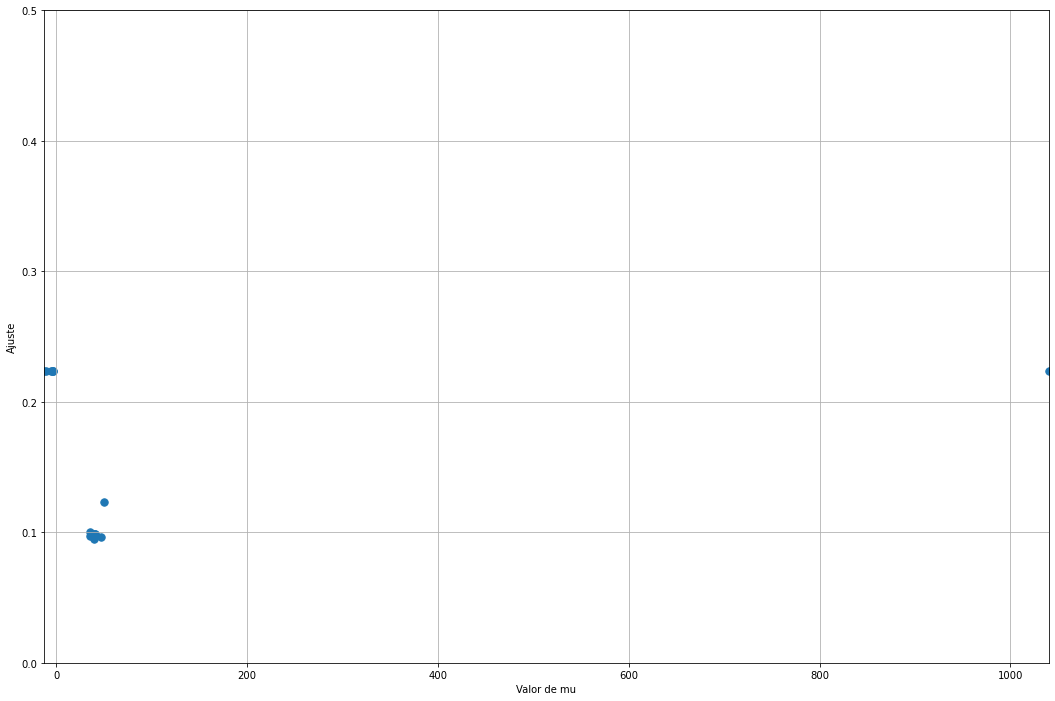

In [46]:
#Visualizamos el mejor resultado para cada uno de los valores tomados de mu.
ajustes = np.array([element.get('mejor').ajuste for element in resul_list])
mus = np.array([element.get('mejor').mu for element in resul_list])

plt.figure(figsize=(18, 12))
plt.scatter(mus,ajustes, s=55, marker='o')
plt.ylim((0,0.5))
plt.ylabel('Ajuste')
plt.xlim((min(mus),max(mus)))
plt.xlabel('Valor de mu')
plt.grid(True)
plt.show()

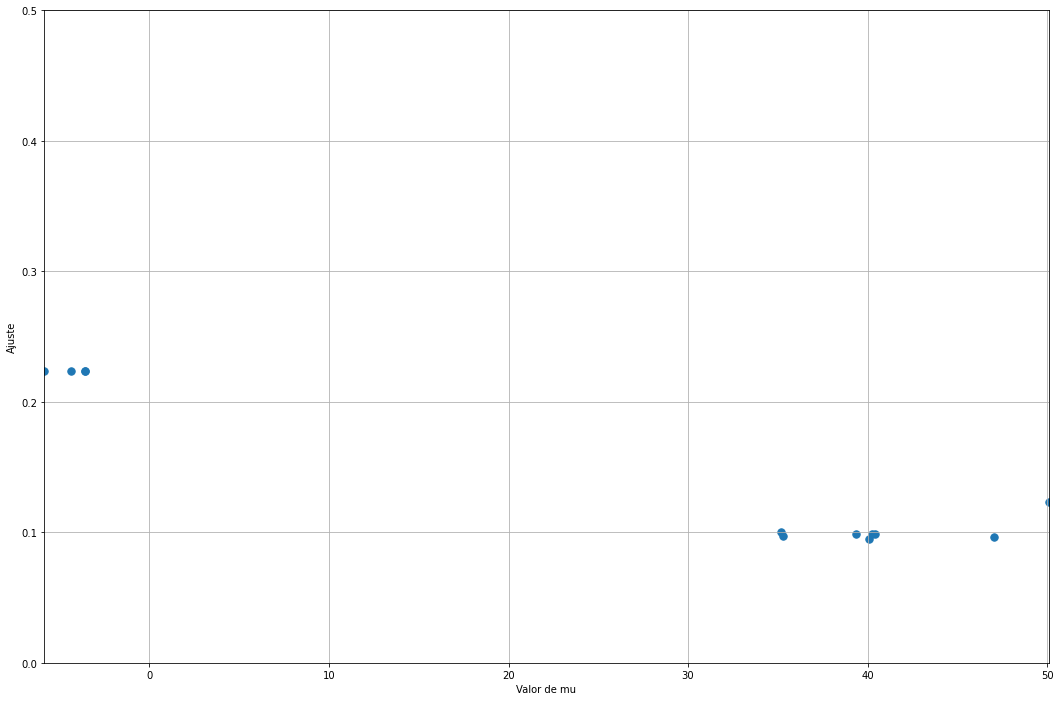

In [54]:
# Filtramos el outlier.
mus_filter=mus[((mus<100) & (mus>-10))]
ajustes_filter=ajustes[((mus<100) & (mus>-10))]


plt.figure(figsize=(18, 12))
plt.scatter(mus_filter,ajustes_filter, s=55, marker='o')
plt.ylim((0,0.5))
plt.ylabel('Ajuste')
plt.xlim((min(mus_filter),max(mus_filter)))
plt.xlabel('Valor de mu')
plt.grid(True)
plt.show()


## Conclusiones

* ¿Qué te parece la calidad del modelo? ¿Qué se te ocurre que podríamos hacer para mejorar?

* **Respuesta_1:** El modelo me parece bueno por que da un ajuste bajo,en este caso el Error Cuadratico Medio, aunque se observa que ara determinados errores de los parámetros mu,sigma y multiplicador, el error o ajuste minimo siempre queda en 0.22354761689862387 y no se logra bajar.

* **Respuesta_2:** Pues como he podido hacer en el challenge es intentar ajustar la inicialización de los parámetros lo más cercano a la realidad. En este caso he elegido el parámetro **mu** y siguiendo una serie de fibonacci para ir eligiendo el rango e que se inicializará ese parámetro. Vemos a que los mejores individuos, con el ajuste más bajo se mueven en valores entorno a un **mu=40** inncluso se llega al ínimo ajuste sin agotar las iteracciones. Otros parámetros para pder mejorar el modelo sería probar valores para **sigma y multiplicador**. Así también aumentando el número de individuos tanto inicial como de las siguientes generaciones que se recombinan.


# Anexo I. Modelos SIR

Al margen de lo que hemos aprendido en el challenge actual, existen modelos específicos epidemiológicos. Uno de los más conocidos y utilizados es el modelo SIR en el que modeliza la población en base a 3 conjuntos:

* **S**: Susceptibles. Población que no dispone de inmunidad y está en posibilidad de infectarse.
* **I**: Infectados. Población actualmente infectada y por tanto es capaz de transmitir la enfermedad.
* **R**: Recuperados. Población que ha pasado la enfermedad y posee inmunidad.

$$ \frac{dS}{dt} = -\beta S I$$
$$ \frac{dI}{dt} = +\beta S I - \gamma I$$
$$ \frac{dR}{dt} = -\gamma I$$

La relación entre estos grupos se basa en diversos parámetros:

* $\beta$: Es la tasa de transmisión.
* $\gamma$: Es la tasa de recuperación.

Vamos a ver como podríamos implementar este modelo de forma sencilla con Python. Para ello vamos a implementar una función que para un dia concreto aplique el modelo anterior. Descompondremos los factores $\beta$ y $\gamma$ en subfactores para hacer el análisis más completo:

In [22]:
def simulate_day(susceptible, infected, deaths, recovered, 
                 transmision_rate=0.15, # Probability of close encounter get infected
                 disease_duration=14, # Duration of the disease in days
                 mortality_rate=0.05, # Mortality rate
                 interaction_rate=2.5, # Average number of close encounters per day per person
                 verbose=False):
    
    pop_ini = susceptible + infected + deaths + recovered
    
    if verbose:
        print(f"Initial population: {pop_ini}")
    
    new_infected = (interaction_rate * transmision_rate) * infected * susceptible / (susceptible + infected + recovered)
    new_deaths = infected * mortality_rate / disease_duration
    new_recovered = infected * (1 - mortality_rate) / disease_duration
    
    susceptible = susceptible - new_infected
    infected = infected + new_infected - new_recovered - new_deaths
    deaths = deaths + new_deaths
    recovered = recovered + new_recovered
    
    pop_end = susceptible + infected + deaths + recovered    

    if verbose:
        print(f"Susceptible: {susceptible}")
        print(f"infected: {infected}")
        print(f"deaths: {deaths}")
        print(f"recovered: {recovered}")        
        print(f"End pop: {pop_end}")
    
    assert (pop_ini - pop_end) < 0.00001    
    
    return susceptible, infected, deaths, recovered

Una vez que tenemos la función anterior implementada podemos utilizarla para simular una epidemia de la siguiente forma:

In [23]:
susceptible = 47000
infected = 1
deaths = 0
recovered = 0

list_susceptible = []
list_infected = []
list_deaths = []
list_recovered = []


for day in range(300):
    susceptible, infected, deaths, recovered = simulate_day(susceptible, infected, deaths, recovered,verbose=True)
    list_susceptible.append(susceptible)
    list_infected.append(infected)
    list_deaths.append(deaths)
    list_recovered.append(recovered)

Initial population: 47001
Susceptible: 46999.62500797855
infected: 1.3035634500177808
deaths: 0.0035714285714285718
recovered: 0.06785714285714285
End pop: 47001.0
Initial population: 47001.0
Susceptible: 46999.13618594833
infected: 1.6992738052423868
deaths: 0.008227012321492075
recovered: 0.1563132341083494
End pop: 47001.00000000001
Initial population: 47001.00000000001
Susceptible: 46998.498983428944
infected: 2.2150996242494023
deaths: 0.014295847340214884
recovered: 0.2716210994640828
End pop: 47000.99999999999
Initial population: 47000.99999999999
Susceptible: 46997.668365018406
infected: 2.8874966330580087
deaths: 0.02220691742681989
recovered: 0.421931431109578
End pop: 47001.0
Initial population: 47001.0
Susceptible: 46996.5856300238
infected: 3.763981868155989
deaths: 0.032519405402027066
recovered: 0.6178687026385142
End pop: 47001.0
Initial population: 47001.0
Susceptible: 46995.17426841526
infected: 4.906487628968337
deaths: 0.04596219778829846
recovered: 0.87328175797767

deaths: 2342.4536341101148
recovered: 44506.61904809217
End pop: 47001.00000000003
Initial population: 47001.00000000003
Susceptible: 151.75016028510976
infected: 0.16451950862997428
deaths: 2342.4542660103148
recovered: 44506.631054195976
End pop: 47001.00000000003
Initial population: 47001.00000000003
Susceptible: 151.74995064554307
infected: 0.1529777547230959
deaths: 2342.4548535799886
recovered: 44506.64221801978
End pop: 47001.00000000003
Initial population: 47001.00000000003
Susceptible: 151.7497557133639
infected: 0.14224570442203263
deaths: 2342.4553999291124
recovered: 44506.652598653134
End pop: 47001.00000000003
Initial population: 47001.00000000003
Susceptible: 151.74957445674977
infected: 0.132266553577453
deaths: 2342.455907949485
recovered: 44506.66225104022
End pop: 47001.00000000004
Initial population: 47001.00000000004
Susceptible: 151.74940591626975
infected: 0.12298748308763975
deaths: 2342.456380330034
recovered: 44506.67122627064
End pop: 47001.00000000004
Initia

Por último vamos a dibujar los resultados obtenidos:

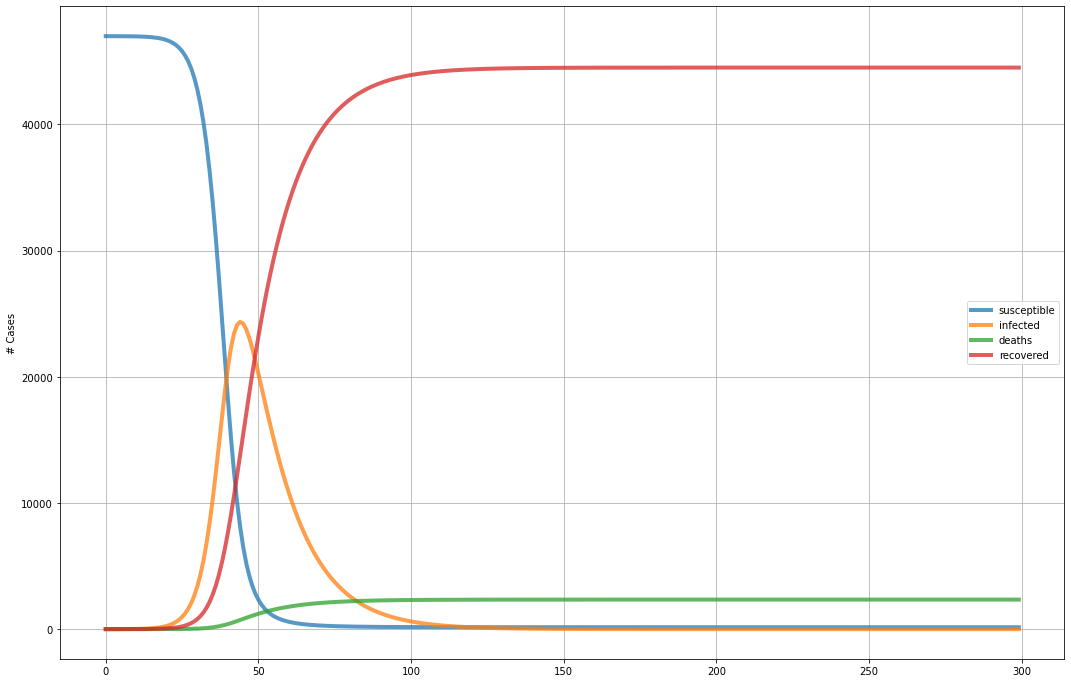

In [24]:
plt.figure(figsize=(18, 12))
plt.plot(list_susceptible, label="susceptible", alpha=0.75, lw=4)
plt.plot(list_infected, label="infected", alpha=0.75, lw=4)
plt.plot(list_deaths, label="deaths", alpha=0.75, lw=4)
plt.plot(list_recovered, label="recovered", alpha=0.75, lw=4)
plt.ylabel('# Cases')
plt.legend()
plt.grid(True)
plt.show()

## Conclusiones

¿Qué te parece este modelo? ¿qué ventajas tiene esta aproximación versus la anterior? ¿podrían combinarse ambos enfoques para producir un modelo más robusto?

* **Respuesta_1:** El módelo SIR como hemos visto es un modelo específico para este caso de uso, en concreto las epidemias, por lo tanto esta preparado muy bien para este tipo de datos. Al ser un algoritmo "white box o caja blanca" para ajustar su funcionamiento y que las predicciones se ajusten lo más posible a la realidad, sus parámetros deben ser ajustados por personas expertas en la materia.

* **Respuesta_2:** Al ser un modelo especificamente para esta materia, si se ajustan bien los parámetros, tenderá a ajustarse mejor, que un algoritmo genético es un algorimto generalista, y que la aproximación de los mejores individuos depende mucho de que la inicalización de los parámetros este en un rango próximo a la realizad. Si la incialización no es buena siempre quedara alejado de poder hacer predicciones correctas o con poco margen de error.

* **Respuesta_3:** Si se pueden combinar primero algoritmo genético para la optimización de los parámetros, haciendo varias ieteracciones y probando con distintas configuraciones de parámetros y luego una vez ajustados esos parámetros optimizados aplicarlos al algoritmo SIR. Entiendo que esto sería parecido a la estrategia de TPOT.